# WeRateDogs Analysis

In [1]:
import pandas as pd
import numpy as np
import tweepy 
import json
import matplotlib.pyplot as plt
import time
import requests


### Gather

##### Enhanced Twitter Archive

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None


In [3]:
twitter_archive_enhanced.shape[0]

2356

##### Additional Data via the Twitter API

In [4]:
#Twitter connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
tweet_id_list=twitter_archive_enhanced.tweet_id.to_list()

In [6]:
tweets, drop_lst = [], []
start = time.time()
for id in tweet_id_list:
    try:
        tweet = api.get_status(id,tweet_mode='extended')
        tweets.append(tweet._json)
        
    except tweepy.TweepError as e:
        error = e.args[0][0]['message']
        drop_lst.append({'tweet_id':id,
                        'error':error})
        
end = time.time()
# To monitor total time taken for gathering data from Twitter API
print(end - start)

Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 731


1908.6924302577972


In [7]:
with open('twee_json.txt', 'w') as fh:
    fh.write('\n'.join(json.dumps(tweet) for tweet in tweets)) 

In [8]:
with open("twee_json.txt") as fh:
    tweets = [json.loads(line) for line in fh if line]

twitter_api_data = pd.DataFrame(tweets)
twitter_api_data.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1064,None,None,Thu Jun 02 00:32:39 +0000 2016,"[0, 63]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 738166379505848322, 'id_str'...",8944,False,This is Axel. He's a professional leaf catcher...,None,...,NaN,NaN,NaN,NaN,3444,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
twitter_api_data.shape[0]

2333

In [10]:
t_api_unfound_data = pd.DataFrame(drop_lst,columns=['tweet_id','error'])
t_api_unfound_data.sample()

,tweet_id,error
7,856602993587888130,No status found with that ID.


##### Image Predictions

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
download = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as outfile:
     outfile.write(download.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.shape[0]

2075

### Assess

In [13]:
twitter_archive_enhanced.shape[0]

2356

In [14]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_archive_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He likes to swing. Subtle tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,None,None,None,None


In [16]:
type(twitter_archive_enhanced['timestamp'][0])

str

_Incorrect Datatypes_ timestamp should be **timestamp** instead of **str**

In [17]:
twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
an             7
Bailey         7
Oscar          6
Dave           6
Koda           6
Milo           6
Jax            6
Jack           6
Scout          6
Leo            6
Rusty          6
Bella          6
Stanley        6
Finn           5
            ... 
all            1
Chesney        1
Jockson        1
Mac            1
Remy           1
Andy           1
Cheryl         1
Dewey          1
Hector         1
Marq           1
Jackie         1
Kloey          1
Arlo           1
Mosby          1
Rizzo          1
Diogi          1
Harnold        1
Maude          1
Laela          1
Blue           1
Stephanus      1
Maisey         1
Remus          1
Fiji           1
Bauer          1
Hubertson      1
Cupid          1
Bronte        

*__Name__ has incorrect enteries such as 'a', 'an', 'the' & 'None'*

In [19]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

*rating_denominator* have outliers.

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


*based on rows with retweeted_status_id we can identify these are __retweets__ that should be cleaned from dataframe*

In [21]:
image_predictions.shape[0]

2075

In [22]:
image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
346,672466075045466113,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,1,cocker_spaniel,0.150424,True,toy_poodle,0.088605,True,Welsh_springer_spaniel,0.072014,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_predictions.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [26]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [27]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


*'_' in names of the breed precitions with two words*

*mixture of cases in the breed names, sometimes lowercase, etc*

In [28]:
sum(image_predictions.duplicated())

0

In [29]:
sum(image_predictions.tweet_id.duplicated())

0

In [30]:
sum(image_predictions.jpg_url.duplicated())

66

In [31]:
duplicateRows_image_predictions = image_predictions[image_predictions.duplicated(['jpg_url'],keep=False)]
duplicateRows_image_predictions.sort_values(by='jpg_url').head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [32]:
image_predictions[image_predictions['jpg_url']=='https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1441,775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True


*Remove duplicate tweets that have same jpg_url, p1, p2 etc*

In [33]:
twitter_api_data.shape[0]

2333

In [34]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [35]:
twitter_api_data.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
264,None,None,Sat Mar 11 18:35:42 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 840632328313495553, 'id_str'...",9147,False,Say hello to Maddie and Gunner. They are consi...,None,...,NaN,NaN,NaN,NaN,1794,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


*Drop unnecessary columns*

#### Quality
##### `Enhanced Twitter Archive` table
1. Erroneous datatype timestamp
2. Remove Retweets based on Retweeted Status Id
3. Drop columns retweeted_status_id,retweeted_status_user_id & retweeted_status_timestamp
4. Name column has incorrect data.
5. ratings_denominator have outliers. 
6. Reorganising dog_stages data into different buckets

##### `Image Predictions` table
7. '_' in the breed predicted columns. 
8. Unsymmetric casetypes in breed predicted columns.
9. Remove duplicate tweets based on same jpg_url

##### `Twitter API Data` table
10. Drop unnecessary columns

#### Tidiness
1. One variable in four columns in `Enchanced Twitter Archive` table (dog_stage)
2. retweet count and favorite count should be part of `Enchanced Twitter Archive`
3. There should be one combined dataset for each tweet_id

### Clean

In [36]:
tae_clean = twitter_archive_enhanced.copy()
image_pred_clean = image_predictions.copy()
tad_clean = twitter_api_data.copy()

In [37]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
tae_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None


#### Quality Issue #1

Fix erroneous datatype for timestamp in **Enhanced Twitter Archive** table.

In [39]:
# remove microseconds from timestamp and convert column timestamp to timestamp datatype
tae_clean['timestamp'] =pd.to_datetime(tae_clean.timestamp, format="%Y-%m-%d %H:%M:%S +%f")
tae_clean['timestamp'] = tae_clean.timestamp[:-5]
tae_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1428,697616773278015490,NaN,NaN,2016-02-11 03:02:54,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697616773...,11,10,None,None,None,pupper,None


In [40]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2351 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Quality Issue #2

*Remove Retweets based on retweeted_status_id*

In [41]:
tae_clean = tae_clean[tae_clean.retweeted_status_id.isnull()]
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2170 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### Quality Issue #3

*Drop columns __retweeted_status_id__, __retweeted_status_user_id__, __retweeted_status_timestamp__*

In [42]:
tae_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2170 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### Quality Issue #4

*Fix __Name__ column*

In [43]:
tae_clean.name.value_counts()

None         680
a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
the            8
Toby           7
Daisy          7
Bella          6
an             6
Stanley        6
Jax            6
Bailey         6
Bo             6
Koda           6
Oscar          6
Buddy          5
Louis          5
Leo            5
Rusty          5
Chester        5
Dave           5
Milo           5
Bentley        5
            ... 
Saydee         1
Brooks         1
Damon          1
Snickers       1
Fiji           1
Remus          1
Maisey         1
Stephanus      1
old            1
BeBe           1
Ridley         1
Sephie         1
space          1
Erik           1
Jameson        1
Leonidas       1
Ralphie        1
Marq           1
Jackie         1
Kloey          1
Arlo           1
Mosby          1
Rizzo          1
Diogi          1
Harnold        1
Maude          1
Hector         1
Meera         

In [44]:
#create df with lowercase name values and uppercase name case values
tae_clean_lowercase_name = tae_clean[tae_clean['name'].str[0].str.islower()]
tae_clean_uppercase_name = tae_clean[tae_clean['name'].str[0].str.isupper()]

In [45]:
tae_clean_lowercase_name.name.value_counts()

a               55
the              8
an               6
very             4
one              4
just             3
quite            3
getting          2
actually         2
not              2
infuriating      1
all              1
such             1
this             1
old              1
light            1
by               1
my               1
life             1
his              1
space            1
mad              1
officially       1
incredibly       1
unacceptable     1
Name: name, dtype: int64

In [46]:
tae_clean_uppercase_name.name.value_counts()

None         680
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Jax            6
Bo             6
Oscar          6
Bailey         6
Koda           6
Stanley        6
Bella          6
Milo           5
Rusty          5
Dave           5
Leo            5
Chester        5
Bentley        5
Buddy          5
Scout          5
Louis          5
Bear           4
Reggie         4
            ... 
Brooks         1
Damon          1
Tess           1
Chelsea        1
Bauer          1
Remus          1
Kanu           1
Maisey         1
Jersey         1
BeBe           1
Ridley         1
Sephie         1
Erik           1
Jameson        1
Leonidas       1
Ralphie        1
Marq           1
Jackie         1
Kloey          1
Arlo           1
Mosby          1
Rizzo          1
Diogi          1
Harnold        1
Maude          1
Hector         1
Rubio          1
Laela         

In [47]:
# Remove lowercase values from Name column 
tae_clean = tae_clean[~tae_clean['name'].str[0].str.islower()]
tae_clean.name.value_counts()

None         680
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Jax            6
Bo             6
Oscar          6
Bailey         6
Koda           6
Stanley        6
Bella          6
Milo           5
Rusty          5
Dave           5
Leo            5
Chester        5
Bentley        5
Buddy          5
Scout          5
Louis          5
Bear           4
Reggie         4
            ... 
Brooks         1
Damon          1
Tess           1
Chelsea        1
Bauer          1
Remus          1
Kanu           1
Maisey         1
Jersey         1
BeBe           1
Ridley         1
Sephie         1
Erik           1
Jameson        1
Leonidas       1
Ralphie        1
Marq           1
Jackie         1
Kloey          1
Arlo           1
Mosby          1
Rizzo          1
Diogi          1
Harnold        1
Maude          1
Hector         1
Rubio          1
Laela         

In [48]:
# Replace None with NaN in Name Column
tae_clean['name'].replace('None', np.nan, inplace=True)
tae_clean.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Stanley       6
Oscar         6
Bella         6
Bo            6
Jax           6
Koda          6
Bailey        6
Leo           5
Dave          5
Rusty         5
Scout         5
Milo          5
Louis         5
Buddy         5
Chester       5
Bentley       5
Gus           4
Scooter       4
Finn          4
             ..
Brooks        1
Damon         1
Tess          1
Chelsea       1
Bauer         1
Remus         1
Kanu          1
Maisey        1
Jersey        1
BeBe          1
Ridley        1
Sephie        1
Erik          1
Jameson       1
Leonidas      1
Ralphie       1
Marq          1
Jackie        1
Kloey         1
Arlo          1
Mosby         1
Rizzo         1
Diogi         1
Harnold       1
Maude         1
Hector        1
Rubio         1
Laela         1
Stephanus     1
Ralphus       1
Name: name, Length: 930,

#### Quality Issue #5

*Remove __ratings_denominator__ outliers*

In [49]:
tae_clean[tae_clean['rating_denominator']!=10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,NaN,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,None,None,None,None


In [50]:
#drop rows which have rating_denominator not equal to 10. 
tae_clean = tae_clean[tae_clean['rating_denominator']==10]
tae_clean.rating_denominator.value_counts()

10    2052
Name: rating_denominator, dtype: int64

In [51]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue #7

Replace " _ " from __p1, p2, p3__ coulumn values.

In [53]:
image_pred_clean['p1'] = image_pred_clean['p1'].str.replace('_', ' ')
image_pred_clean['p2'] = image_pred_clean['p2'].str.replace('_', ' ')
image_pred_clean['p3'] = image_pred_clean['p3'].str.replace('_', ' ')
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue #8

*Fix random case for values of __p1, p2, p3__ coulumns to Title Case.*

In [54]:
image_pred_clean['p1'] = image_pred_clean['p1'].str.title()
image_pred_clean['p2'] = image_pred_clean['p2'].str.title() 
image_pred_clean['p3'] = image_pred_clean['p3'].str.title() 
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issue #9

*Remove duplicate tweets based on same __jpg_url__ column*

In [55]:
image_pred_clean[image_pred_clean.duplicated(['jpg_url'],keep=False)].sort_values(by='jpg_url').head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,Upright,0.303415,False,Golden Retriever,0.181351,True,Brittany Spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,Upright,0.303415,False,Golden Retriever,0.181351,True,Brittany Spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan Mastiff,0.506312,True,Tibetan Terrier,0.295690,True,Otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan Mastiff,0.506312,True,Tibetan Terrier,0.295690,True,Otterhound,0.036251,True


In [56]:
image_pred_clean.shape[0]

2075

In [57]:
# drop duplicate rows
image_pred_clean.drop_duplicates(['jpg_url'],inplace=True)
image_pred_clean[image_pred_clean.duplicated(['jpg_url'],keep=False)].sort_values(by='jpg_url').head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [58]:
image_pred_clean.shape[0]

2009

#### Quality Issue #10

*Drop unnecessary columns from __twitter_api_data__*

In [59]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [60]:
#Create column with tweet_id, favorite_count & retweet_count. 
#We need Tweet_id to join the dataframe with Enhanced Twitter Archive and we need favorite count and retweet count as they're unavailable in Enhanced Twitter Archive dataframe.

tad_clean = tad_clean.filter(['id','favorite_count','retweet_count'],axis=1)
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [61]:
#rename column id to tweet_id
tad_clean.rename(columns = {'id':'tweet_id'},inplace=True)
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Tidiness Issue #1

In [62]:
# Melt the doggo, floofer, pupper, puppo columns to a dog_stage column.
tae_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
959,751251247299190784,NaN,NaN,2016-07-08 03:07:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Gilbert. He's being chased by a battal...,https://twitter.com/dog_rates/status/751251247...,10,10,Gilbert,None,None,None,None


In [63]:
# Replace None with '' in puppo column
tae_clean['puppo'].replace('None','',inplace=True)
tae_clean.puppo.value_counts()

         2027
puppo      25
Name: puppo, dtype: int64

In [64]:
# Replace None with '' in doggo column
tae_clean['doggo'].replace('None','',inplace=True)
tae_clean.doggo.value_counts()

         1968
doggo      84
Name: doggo, dtype: int64

In [65]:
# Replace None with '' in pupper column
tae_clean['pupper'].replace('None','',inplace=True)
tae_clean.doggo.value_counts()

         1968
doggo      84
Name: doggo, dtype: int64

In [66]:
# Replace None with '' in floofer column
tae_clean['floofer'].replace('None','',inplace=True)
tae_clean.doggo.value_counts()

         1968
doggo      84
Name: doggo, dtype: int64

In [67]:
tae_clean['dog_stages'] = tae_clean['doggo']+tae_clean['floofer']+tae_clean['pupper']+tae_clean['puppo'] 

In [68]:
tae_clean.dog_stages.value_counts()

                1722
pupper           213
doggo             73
puppo             24
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

#### Quality Issue #6

*Reorganizing __dog_stages__ data vaules in correct buckets*

Based on **The Dogtionary** puppo, pupper & doggo are stages and floofer can be accredited with any dog with fur. 
Hence, it makes sense to make following replacements:- 
- doggopupper with doggo who's just behaving like a  pupper
- doggopuppo with puppo as it's advanced stage of doggo
- doggofloofer with doggo 
- floofer with none as it is not a stage, just any dog really. 

In [69]:
tae_clean['dog_stages'].replace('doggopupper','doggo',inplace=True)
tae_clean['dog_stages'].replace('doggofloofer','doggo',inplace=True)
tae_clean['dog_stages'].replace('doggopuppo','puppo',inplace=True)
tae_clean['dog_stages'].replace('floofer','',inplace=True)
tae_clean.dog_stages.value_counts()

          1731
pupper     213
doggo       83
puppo       25
Name: dog_stages, dtype: int64

In [70]:
# Replace '' with NaN in dog_stages column
tae_clean['dog_stages'].replace('',np.nan,inplace=True)
tae_clean.dog_stages.value_counts()

pupper    213
doggo      83
puppo      25
Name: dog_stages, dtype: int64

In [71]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2052 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2050 non-null datetime64[ns]
source                   2052 non-null object
text                     2052 non-null object
expanded_urls            1998 non-null object
rating_numerator         2052 non-null int64
rating_denominator       2052 non-null int64
name                     1388 non-null object
doggo                    2052 non-null object
floofer                  2052 non-null object
pupper                   2052 non-null object
puppo                    2052 non-null object
dog_stages               321 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 256.5+ KB


In [72]:
#drop columns doggo, floofer, pupper, puppo
tae_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2052 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2050 non-null datetime64[ns]
source                   2052 non-null object
text                     2052 non-null object
expanded_urls            1998 non-null object
rating_numerator         2052 non-null int64
rating_denominator       2052 non-null int64
name                     1388 non-null object
dog_stages               321 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 192.4+ KB


#### Tidiness Issue #2

*Merge retweet count and favorite count from __`Twitter API Data`__ with __`Enchanced Twitter Archive`__*

In [73]:
tae_clean.shape[0]

2052

In [74]:
tad_clean.shape[0]

2333

In [75]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2052 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2050 non-null datetime64[ns]
source                   2052 non-null object
text                     2052 non-null object
expanded_urls            1998 non-null object
rating_numerator         2052 non-null int64
rating_denominator       2052 non-null int64
name                     1388 non-null object
dog_stages               321 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 192.4+ KB


In [76]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [77]:
#Merging Twitter API data with Enhanced Twitter Archive data.
tae_clean = pd.merge(tae_clean,tad_clean, on='tweet_id',how='left')

In [78]:
tae_clean.shape[0]

2052

In [79]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 13 columns):
tweet_id                 2052 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2050 non-null datetime64[ns]
source                   2052 non-null object
text                     2052 non-null object
expanded_urls            1998 non-null object
rating_numerator         2052 non-null int64
rating_denominator       2052 non-null int64
name                     1388 non-null object
dog_stages               321 non-null object
favorite_count           2045 non-null float64
retweet_count            2045 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 224.4+ KB


#### Tidiness Issue #3

*There should be one combined dataset for each tweet_id.
Merge `Enchanced Twitter Archive` with `Image Predictions` table*

In [80]:
tae_clean.shape[0]

2052

In [81]:
image_pred_clean.shape[0]

2009

In [82]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 13 columns):
tweet_id                 2052 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2050 non-null datetime64[ns]
source                   2052 non-null object
text                     2052 non-null object
expanded_urls            1998 non-null object
rating_numerator         2052 non-null int64
rating_denominator       2052 non-null int64
name                     1388 non-null object
dog_stages               321 non-null object
favorite_count           2045 non-null float64
retweet_count            2045 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 224.4+ KB


In [83]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [84]:
#Merging Enhanced Twitter Archive data with Image Predictions data. 
#We'll be doing a right join between Enhanced Twitter Archive data & Image Predictions data to anlyze only those tweets for which we have image predictions data. 

tweet_data = pd.merge(tae_clean,image_pred_clean, on='tweet_id',how='right')

In [85]:
tweet_data.shape[0]

2009

In [86]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 24 columns):
tweet_id                 2009 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1879 non-null datetime64[ns]
source                   1881 non-null object
text                     1881 non-null object
expanded_urls            1881 non-null object
rating_numerator         1881 non-null float64
rating_denominator       1881 non-null float64
name                     1347 non-null object
dog_stages               287 non-null object
favorite_count           1874 non-null float64
retweet_count            1874 non-null float64
jpg_url                  2009 non-null object
img_num                  2009 non-null int64
p1                       2009 non-null object
p1_conf                  2009 non-null float64
p1_dog                   2009 non-null bool
p2                       2009 non-null object
p2_conf      

### Store

In [87]:
tweet_data.to_csv("twitter_archive_master.csv",index=False)

### Analyse

In [88]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
704,750101899009982464,NaN,NaN,2016-07-04 23:00:03,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,https://twitter.com/dog_rates/status/750101899...,11.0,10.0,Lilah,...,2,Golden Retriever,0.316704,True,Llama,0.174269,False,Labrador Retriever,0.147364,True


In [89]:
twitter_archive_master.shape[0]

2009

In [90]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 24 columns):
tweet_id                 2009 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1879 non-null object
source                   1881 non-null object
text                     1881 non-null object
expanded_urls            1881 non-null object
rating_numerator         1881 non-null float64
rating_denominator       1881 non-null float64
name                     1347 non-null object
dog_stages               287 non-null object
favorite_count           1874 non-null float64
retweet_count            1874 non-null float64
jpg_url                  2009 non-null object
img_num                  2009 non-null int64
p1                       2009 non-null object
p1_conf                  2009 non-null float64
p1_dog                   2009 non-null bool
p2                       2009 non-null object
p2_conf              

In [91]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2.009000e+03,2.200000e+01,2.200000e+01,1881.000000,1881.0,1874.000000,1874.000000,2009.000000,2009.000000,2.009000e+03,2.009000e+03
mean,7.363346e+17,6.984288e+17,4.196984e+09,11.800106,10.0,8584.267343,2541.979189,1.202588,0.594467,1.340727e-01,6.017061e-02
std,6.771673e+16,4.451659e+16,0.000000e+00,41.864312,0.0,12460.533644,4531.750620,0.559483,0.272236,1.006394e-01,5.085369e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,73.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758707e+17,6.724855e+17,4.196984e+09,10.000000,10.0,1913.750000,575.250000,1.000000,0.362925,5.353130e-02,1.610520e-02
50%,7.088458e+17,6.756022e+17,4.196984e+09,11.000000,10.0,3902.000000,1241.000000,1.000000,0.588230,1.170030e-01,4.947150e-02
75%,7.887659e+17,7.032024e+17,4.196984e+09,12.000000,10.0,10759.250000,2909.250000,1.000000,0.847292,1.948970e-01,9.157150e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,10.0,159871.000000,79858.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [92]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [93]:
twitter_archive_master.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Stanley       6
Bella         6
Koda          6
Bo            6
Jax           6
Buddy         5
Rusty         5
Dave          5
Chester       5
Milo          5
Oscar         5
Leo           5
Louis         5
Bailey        5
Scout         5
Cassie        4
Dexter        4
Jerry         4
Archie        4
             ..
Pancake       1
Jareld        1
Saydee        1
Brooks        1
Damon         1
Remus         1
Maisey        1
Stephanus     1
Marq          1
Rodman        1
Jersey        1
BeBe          1
Ridley        1
Sephie        1
Erik          1
Jameson       1
Leonidas      1
Ralphie       1
Jackie        1
Laela         1
Kloey         1
Arlo          1
Mosby         1
Rizzo         1
Diogi         1
Harnold       1
Maude         1
Hector        1
Rubio         1
Ralphus       1
Name: name, Length: 911,

In [94]:
twitter_archive_master.name.value_counts().head(10)

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
Toby        7
Name: name, dtype: int64

##### Insight 1 
*Top 10 Names*

##### Top 10 Names by Avg Numerator Ratings are:- 

In [95]:
twitter_archive_master.groupby(['name']).rating_numerator.mean().sort_values(ascending=False).head(10)

name
Atticus     893.5
Logan        75.0
Sophie       15.0
General      14.0
Emmy         14.0
Kuyu         14.0
Cermet       14.0
Smiley       14.0
Iggy         14.0
Sundance     14.0
Name: rating_numerator, dtype: float64

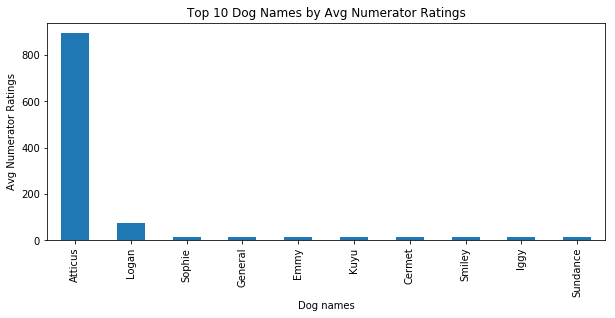

In [96]:
twitter_archive_master.groupby(['name']).rating_numerator.mean().sort_values(ascending=False).head(10).plot(title='Top 10 Dog Names by Avg Numerator Ratings',figsize=(10,4), kind="bar");
plt.xlabel('Dog names',fontsize=10);
plt.ylabel('Avg Numerator Ratings',fontsize=10);

##### Top 10 Names by Avg Favorite Count are:- 

In [97]:
twitter_archive_master.groupby(['name']).favorite_count.mean().sort_values(ascending=False).head(10)

name
Stephan    123515.0
Jamesy     118869.0
Duddles    101403.0
Aja         76251.0
Lilly       68684.0
Canela      65905.0
Pipsy       46570.0
Barney      45125.0
Alfy        42972.0
Dewey       41067.0
Name: favorite_count, dtype: float64

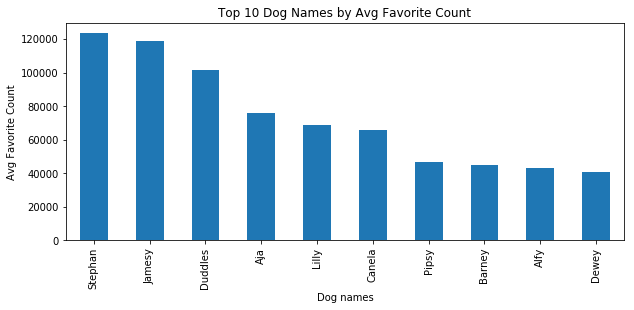

In [98]:
twitter_archive_master.groupby(['name']).favorite_count.mean().sort_values(ascending=False).head(10).plot(title='Top 10 Dog Names by Avg Favorite Count',figsize=(10,4), kind="bar");
plt.xlabel('Dog names',fontsize=10);
plt.ylabel('Avg Favorite Count',fontsize=10);

##### Top 10 Names by Avg Retweet Count are:- 

In [99]:
twitter_archive_master.groupby(['name']).retweet_count.mean().sort_values(ascending=False).head(10)

name
Stephan    58248.0
Duddles    41559.0
Jamesy     33792.0
Hurley     19138.0
Aja        17820.0
Lilly      17320.0
Canela     16842.0
Pipsy      16460.0
Kenneth    15595.5
Ken        15435.0
Name: retweet_count, dtype: float64

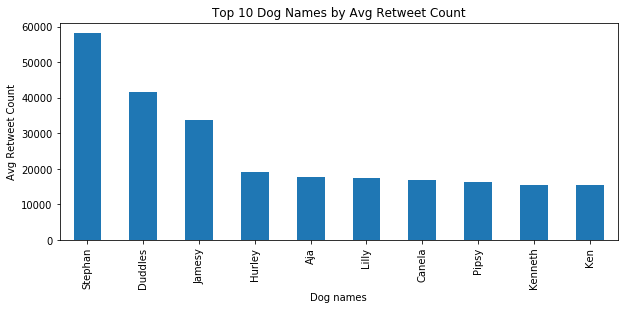

In [100]:
twitter_archive_master.groupby(['name']).retweet_count.mean().sort_values(ascending=False).head(10).plot(title='Top 10 Dog Names by Avg Retweet Count',figsize=(10,4), kind="bar");
plt.xlabel('Dog names',fontsize=10);
plt.ylabel('Avg Retweet Count',fontsize=10);

##### Insight 2 
*Numerator Ratings* aren't influencing *Favorite Count* & *Retweet Count*. But there is some relationship between *Favorite Count* & *Retweet Count* as Top 5 Names by Avg *Favorite Count* also are in Top 6 Names by Avg *Retweet Count*. 

##### Count of dogs at different stages are:- 

In [101]:
twitter_archive_master.dog_stages.value_counts()

pupper    194
doggo      70
puppo      23
Name: dog_stages, dtype: int64

##### % of dogs at different stages are:- 

In [102]:
twitter_archive_master.dog_stages.value_counts()/twitter_archive_master.dog_stages.count()*100

pupper    67.595819
doggo     24.390244
puppo      8.013937
Name: dog_stages, dtype: float64

##### Avg Numerator Rating of dogs at different stages are:- 

In [103]:
twitter_archive_master.groupby(['dog_stages']).rating_numerator.mean()

dog_stages
doggo     11.757143
pupper    10.695876
puppo     12.043478
Name: rating_numerator, dtype: float64

##### Avg Favorite_count of dogs at different stages are:- 

In [104]:
twitter_archive_master.groupby(['dog_stages']).favorite_count.mean()

dog_stages
doggo     18795.014493
pupper     6762.871134
puppo     22240.608696
Name: favorite_count, dtype: float64

##### Avg Retweet_count of dogs at different stages are:- 

In [105]:
twitter_archive_master.groupby(['dog_stages']).retweet_count.mean()

dog_stages
doggo     6421.492754
pupper    2127.159794
puppo     6478.347826
Name: retweet_count, dtype: float64

##### Insight 3
- Most common dog stage classifications/records are for *__Pupper (67.5%)__* i.e. *"A small doggo."*
- __*Puppo*__ i.e. dogs that are in *"A transitional phase between __pupper__ and __doggo__."* have __least__ number of classifications/records *__8%__* among the tweets but have __highest__  __*Numerator Ratings, Avg Favorite Count and Avg Retweet Count*__

In [106]:
twitter_archive_master.p1_dog.value_counts()

True     1480
False     529
Name: p1_dog, dtype: int64

In [107]:
twitter_archive_master.p1_dog.value_counts()/twitter_archive_master.shape[0]*100

True     73.668492
False    26.331508
Name: p1_dog, dtype: float64

In [108]:
twitter_archive_master.groupby('p1_dog').p1_conf.mean()*100

p1_dog
False    53.919063
True     61.422430
Name: p1_conf, dtype: float64

- In case of *Prediction#1* with Avg 61.4% confidence the algorithm predicted a dog breed 73.66% times.

In [109]:
twitter_archive_master.p2_dog.value_counts()

True     1500
False     509
Name: p2_dog, dtype: int64

In [110]:
twitter_archive_master.p2_dog.value_counts()/twitter_archive_master.shape[0]*100

True     74.664012
False    25.335988
Name: p2_dog, dtype: float64

In [111]:
twitter_archive_master.groupby('p2_dog').p2_conf.mean()*100

p2_dog
False    11.696732
True     13.987713
Name: p2_conf, dtype: float64

- In case of *Prediction#2* with Avg 13.9% confidence the algorithm predicted a dog breed 74.66% times.

In [112]:
twitter_archive_master.p3_dog.value_counts()

True     1450
False     559
Name: p3_dog, dtype: int64

In [113]:
twitter_archive_master.groupby('p3_dog').p3_conf.mean()*100

p3_dog
False    5.730251
True     6.127632
Name: p3_conf, dtype: float64

In [114]:
twitter_archive_master.p3_dog.value_counts()/twitter_archive_master.shape[0]*100

True     72.175212
False    27.824788
Name: p3_dog, dtype: float64

- In case of *Prediction#3* with Avg 6.12% confidence the algorithm predicted a dog breed 72.17% times.

In [115]:
twitter_archive_master.groupby(['p1_dog','p2_dog','p3_dog']).size()/twitter_archive_master.shape[0]*100

p1_dog  p2_dog  p3_dog
False   False   False     15.828771
                True       3.086112
        True    False      2.638128
                True       4.778497
True    False   False      2.140368
                True       4.280737
        True    False      7.217521
                True      60.029866
dtype: float64

##### Insight 4
- __15.82%__ times all 3 breed predictions were *__incorrect__*. 
- __60%__ times all 3 breed predictions were *__correct__*. 
- In case of *Prediction#1* with Avg 61.4% confidence the algorithm predicted a dog breed 73.66% times.
- In case of *Prediction#2* with Avg 13.9% confidence the algorithm predicted a dog breed 74.66% times.
- In case of *Prediction#3* with Avg 6.12% confidence the algorithm predicted a dog breed 72.17% times.

In [117]:
twitter_archive_master[twitter_archive_master['p1_dog']==True].groupby('p1').size().sort_values(ascending=False).head(30)

p1
Golden Retriever               139
Labrador Retriever              95
Pembroke                        88
Chihuahua                       79
Pug                             55
Chow                            41
Samoyed                         40
Toy Poodle                      38
Pomeranian                      38
Malamute                        29
Cocker Spaniel                  27
French Bulldog                  26
Chesapeake Bay Retriever        23
Miniature Pinscher              22
Siberian Husky                  20
German Shepherd                 20
Staffordshire Bullterrier       19
Eskimo Dog                      18
Maltese Dog                     18
Shetland Sheepdog               18
Rottweiler                      17
Cardigan                        17
Shih-Tzu                        17
Beagle                          17
Kuvasz                          16
Lakeland Terrier                16
Italian Greyhound               16
West Highland White Terrier     14
Great Pyrenees   

In [119]:
#creating a subset of image predictions #1 results which predicted a dog breed. 
prediction1_df = twitter_archive_master[twitter_archive_master['p1_dog']==True].filter(['tweet_id','p1','favorite_count','retweet_count'],axis=1)

In [120]:
prediction1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 1 to 2007
Data columns (total 4 columns):
tweet_id          1480 non-null int64
p1                1480 non-null object
favorite_count    1387 non-null float64
retweet_count     1387 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 57.8+ KB


In [121]:
#creating a groupby dataframe of p1 i.e. prediction1 breed names with mean favorite count, mean retweet count and count of tweet ids i.e nos of records for each predicted breed.
grouping = {'favorite_count':['mean'],'retweet_count':['mean'],'tweet_id':['count']}
p1_favorite_count_mean2 = prediction1_df.groupby(['p1'],as_index=False).agg(grouping)
p1_favorite_count_mean2.columns = ['_'.join(col) for col in p1_favorite_count_mean2.columns.values]
p1_favorite_count_mean2.rename(columns = {'p1_':'prediction1_breed'},inplace=True)

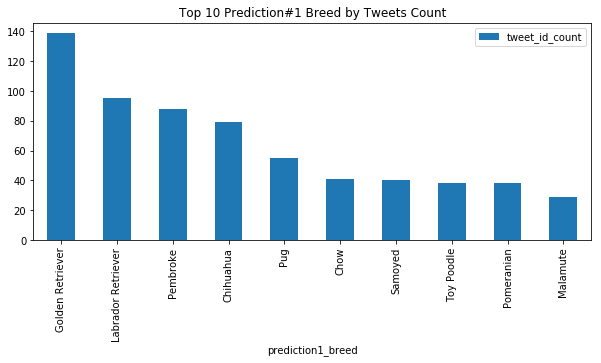

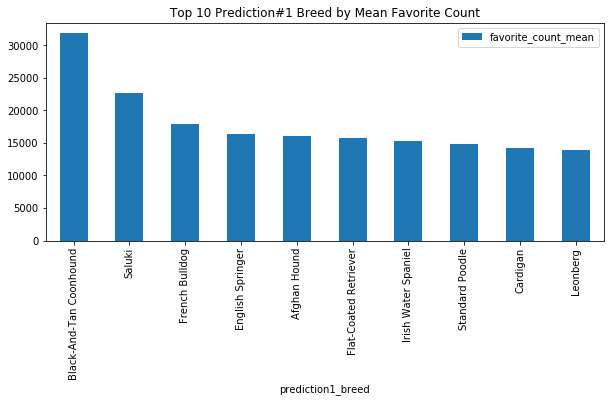

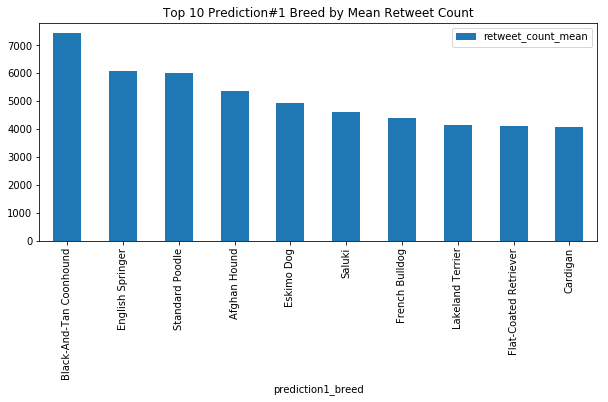

In [122]:
p1_favorite_count_mean2.sort_values(by=['tweet_id_count'],ascending=False).head(10).plot(title='Top 10 Prediction#1 Breed by Tweets Count',x="prediction1_breed", y=["tweet_id_count"],figsize=(10,4), kind="bar");
p1_favorite_count_mean2.sort_values(by=['favorite_count_mean'],ascending=False).head(10).plot(title='Top 10 Prediction#1 Breed by Mean Favorite Count',x="prediction1_breed", y=["favorite_count_mean"],figsize=(10,4), kind="bar");
p1_favorite_count_mean2.sort_values(by=['retweet_count_mean'],ascending=False).head(10).plot(title='Top 10 Prediction#1 Breed by Mean Retweet Count',x="prediction1_breed", y=["retweet_count_mean"],figsize=(10,4), kind="bar");

From above images we can visually analyze there is __no correlation__ between Top 10 Prediction#1 Breeds by value count and Top 10 Prediction#1 Breeds by Favorite Count and Retweet count but the __breeds__ with *Top 10 Prediction#1 Breeds by Favorite Count and Retweet Count* __overlap with each other__. 

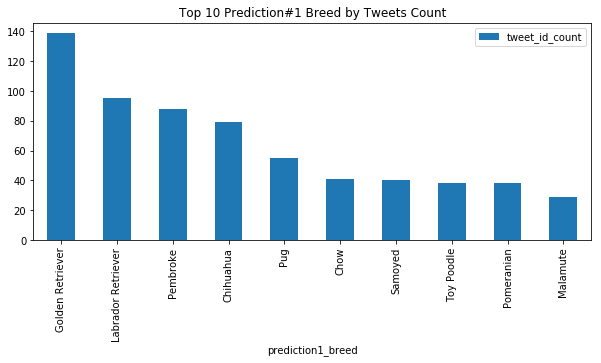

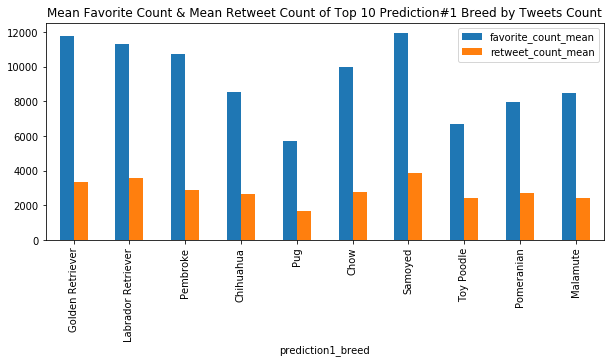

In [123]:
p1_favorite_count_mean2.sort_values(by=['tweet_id_count'],ascending=False).head(10).plot(title='Top 10 Prediction#1 Breed by Tweets Count',x="prediction1_breed", y=["tweet_id_count"],figsize=(10,4), kind="bar");
p1_favorite_count_mean2.sort_values(by=['tweet_id_count'],ascending=False).head(10).plot(title='Mean Favorite Count & Mean Retweet Count of Top 10 Prediction#1 Breed by Tweets Count',x="prediction1_breed", y=["favorite_count_mean", "retweet_count_mean"],figsize=(10,4), kind="bar");

From above image we can analyze that it’s __not certain__ that all Top 10 Prediction#1 Breeds by count may also have same hierarchy with respect to _Top 10 Prediction#1 Breeds by Favorite Count & Retweet Count._ 